In [17]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [18]:
#实例化两个全1的10000维向量
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [19]:
#定义一个计时器 因为需要频繁的进行运行时间的基准测试
class Timer :#@save
    #记录多次运行时间
    def __init__(self):
        #创建一个表示运行时间的列表
        self.times = []
        #开始计时
        self.start()

    def start(self):
        #启动计时器 并且用tik保留运行开始的时间
        self.tik =time.time()

    def stop(self):
        #停止计时器并且将运行时间（结束时间-开始时间）记录在列表中
        self.times.append(time.time()-self.tik)
        #返回运行时间（times列表的最后一项）
        return self.times[-1]
    
    def avg(self):
        #返回运行的平均时间
        return sum(self.times)/len(self.times)
    
    def sum(self):
        #返回运行时间总和
        return sum(self.times)
    
    def cumsum(self):
        #返回累计时间
        return np.array(self.times).cumsum.tolist()
    


In [20]:
#对工作负载进行基准测试
c =torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f"{timer.stop():.5f} sec"

'0.05501 sec'

In [21]:
timer.start()
d=a+b
f"{timer.stop():.5f} sec"


'0.00000 sec'

由以上代码可以知道，第二种方法明显比第一种要快的多。矢量化代码会带来数量级的加速，我们可以把数学运算符放到库中，无需自己编写那么多的计算，同时也能减少出错的可能性。

正态分布与平方损失

In [28]:
# 定义一个python函数来计算正态分布
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)


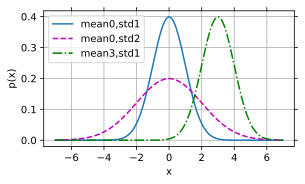

In [29]:
#再次使用numpy进行可视化
x=np.arange(-7,7,0.01)
#均值和标准差对
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',
        ylabel='p(x)',figsize=(4.5,2.5),
        legend=[f'mean{mu},std{sigma}' for mu,sigma in params])

改变均值会产生沿着x轴的便宜，增加方差会分散分布、降低其峰值